In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn import model_selection
from sklearn.model_selection import train_test_split  
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression  
from math import sqrt

In [2]:
df = pd.read_csv('petrol_consumption.csv')  
df.shape

(48, 5)

In [3]:
df.head()

Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
0         9.0            3571            1976                         0.525   
1         9.0            4092            1250                         0.572   
2         9.0            3865            1586                         0.580   
3         7.5            4870            2351                         0.529   
4         8.0            4399             431                         0.544   

   Petrol_Consumption  
0                 541  
1                 524  
2                 561  
3                 414  
4                 410

In [4]:
df.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [5]:
df.describe()

Petrol_tax  Average_income  Paved_Highways  \
count   48.000000       48.000000       48.000000   
mean     7.668333     4241.833333     5565.416667   
std      0.950770      573.623768     3491.507166   
min      5.000000     3063.000000      431.000000   
25%      7.000000     3739.000000     3110.250000   
50%      7.500000     4298.000000     4735.500000   
75%      8.125000     4578.750000     7156.000000   
max     10.000000     5342.000000    17782.000000   

       Population_Driver_licence(%)  Petrol_Consumption  
count                     48.000000           48.000000  
mean                       0.570333          576.770833  
std                        0.055470          111.885816  
min                        0.451000          344.000000  
25%                        0.529750          509.500000  
50%                        0.564500          568.500000  
75%                        0.595250          632.750000  
max                        0.724000          968.000000

In [6]:
X = df[['Petrol_tax', 'Average_income', 'Paved_Highways',  
       'Population_Driver_licence(%)']]
y = df['Petrol_Consumption']  

In [7]:
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(X,y,test_size=0.4,random_state=42)
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(28, 4)
(28,)
(20, 4)
(20,)


In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs = -1)
model.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [9]:
print(model.intercept_)
print(model.coef_)

451.568778651
[ -3.67150269e+01  -3.84348579e-02  -4.03350259e-03   1.04032691e+03]


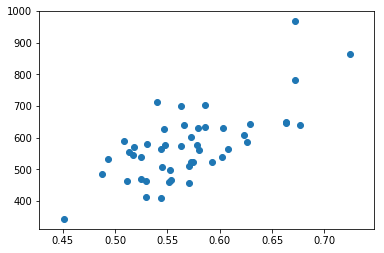

In [10]:
plt.scatter(df['Population_Driver_licence(%)'],df.Petrol_Consumption)
plt.show()

In [11]:
print('R2 Value/Coefficient of Determination: {}'.format(model.score(xtest, ytest)))

R2 Value/Coefficient of Determination: 0.5780264357116537


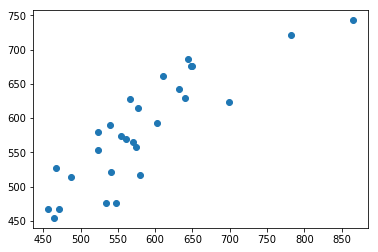

In [12]:
plt.scatter(ytrain,model.predict(xtrain))

In [13]:
print(sqrt(mean_squared_error(ytrain, model.predict(xtrain))))

46.46337613779526


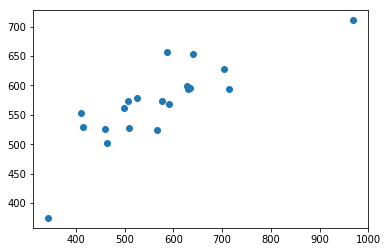

In [14]:
plt.scatter(ytest,model.predict(xtest))

In [15]:
print(sqrt(mean_squared_error(ytest, model.predict(xtest))))

86.30916718138076


In [16]:
pd.DataFrame({'Actual': ytest, 'Predicted': model.predict(xtest)})  

Actual   Predicted
27     631  594.187325
40     587  656.100132
26     577  573.647438
43     591  568.579641
24     460  526.346392
37     704  628.660602
12     525  578.618351
19     640  652.705297
4      410  552.973021
25     566  524.912264
8      464  502.666332
3      414  529.878488
6      344  374.731380
39     968  710.912986
33     628  599.617012
13     508  573.305860
17     714  594.381018
45     510  527.225709
15     635  596.527024
9      498  561.092957